KNN

1.Attribuez aléatoirement des centroïdes pour démarrer les choses.

2. En fonction de ces centroïdes (et de la distance qui les sépare), affectez chaque observation à un cluster.

3. Calculez les coordonnées moyennes de chaque cluster; ce sont nos nouveaux centroïdes.

4. Réaffectez les clusters en fonction des nouveaux centroïdes.

5. Continuez à répéter les étapes 3 et 4 jusqu'à la convergence.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib

In [166]:
df = pd.read_csv("dataset_1.csv")
df

,Unnamed: 0,normalized_age,normalized_salary
0,0,0.680267,-0.016342
1,1,3.809518,0.798483
2,2,-1.661372,-0.577667
3,3,-0.257307,-0.155552
4,4,0.698017,0.174561
...,...,...,...
995,995,-5.060165,2.482045
996,996,-5.079404,2.773580
997,997,-5.861520,3.068426
998,998,-5.018934,3.110904


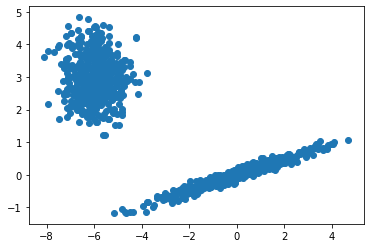

In [167]:
plt.scatter(df['normalized_age'], df['normalized_salary'])

In [168]:
X = df[['normalized_age','normalized_salary']]
X.shape

(1000, 2)

###  Calcule de  la distance euclidienne 

Distance euclidienne => la racine carrée de la somme des différences au carré entre les deux vecteurs .

- Distance euclidienne = sqrt (somme i à N (x1_i - x2_i) ^ 2)

Où x1 est la première ligne de données, x2 est la deuxième ligne de données et i est l'index d'une colonne spécifique lorsque nous additionnons toutes les colonnes.

Avec la distance euclidienne, plus la valeur est petite, plus les deux enregistrements seront similaires. Une valeur de 0 signifie qu'il n'y a pas de différence entre deux enregistrements.

In [169]:
def calc_distance(x1, x2):
    distance = (sum((x1 - x2)**2))**0.5
    return distance

###  Assigner les clusters  en fonction du centroïde le plus proche 

In [170]:
#  calculer la distance entre chaque observation et chaque centroïde
def assign_clusters(centroids, cluster_array): # cluster_array correspond à chaque features c a dire X
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i])) # on calcule la distance euc entre chaq point et les centroid
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

Il attribue ensuite une observation à un cluster en fonction du centroïde dont il est le plus proche. Le résultat est la liste de l'étiquette de cluster de chaque observation.

pb : les centroides sont assignés aléatoirement 

### Mise à jour des nouveaux centroïdes

In [124]:
# Calculer les nouveaux centroïdes sur la base de la moyenne 
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

Concatèner les données (salaire et âge de chaque observation), cluster_array et le cluster actuel auquel il appartient, ensemble dans un dataframe => cluster_df 

### Calculer la variance à l'intérieur de chaque cluster

In [105]:
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

On filtre cluster_df par cluster, calcule la moyenne, puis soustrait la moyenne du cluster de chaque observation au sein du cluster.
repmat , prend un tableau donné et le reproduit - dans notre cas, nous voulons copier la moyenne autant de fois que nous avons d'observations afin de pouvoir soustraire directement les deux tableaux.

In [106]:
cluster_data = X
cluster_array = np.array(cluster_data

In [260]:
centroid = random.sample(list(cluster_array),range(k))

In [278]:
import random
k = 2
cluster_vars = []
iteration = 10
i = 0
#centroids = [cluster_array[i] for i in range(k)]
centroids = random.sample(list(cluster_array), k)
clusters = assign_clusters(centroids, cluster_array)
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

while i < iteration:
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, cluster_array))
    cluster_vars.append(cluster_var)
    i+=1
    print(i, round(cluster_var))

0 6206.0
1 995.0
2 980.0
3 980.0
4 980.0
5 980.0
6 980.0
7 980.0
8 980.0
9 980.0
10 980.0


In [279]:
centroids

[0    0.013882
 1    0.010335
 dtype: float64,
 0   -5.969507
 1    2.954551
 dtype: float64]

cluster_vars => la moyenne des sommes d'écarts au carré des clusters par rapport à leurs centroïdes dans la liste 
Cette moyenne est une mesure approximative du niveau de variance au sein de chaque cluster. 
A partir de la 5éme itaration elle  se stabilise.

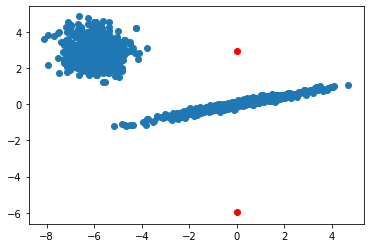

In [280]:
plt.scatter(df['normalized_age'], df['normalized_salary'])
plt.scatter(centroids[0],centroids[1], c='r')
plt.show()

In [281]:
cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_df

,0,1,cluster
0,0.680267,-0.016342,0
1,3.809518,0.798483,0
2,-1.661372,-0.577667,0
3,-0.257307,-0.155552,0
4,0.698017,0.174561,0
...,...,...,...
995,-5.060165,2.482045,1
996,-5.079404,2.773580,1
997,-5.861520,3.068426,1
998,-5.018934,3.110904,1


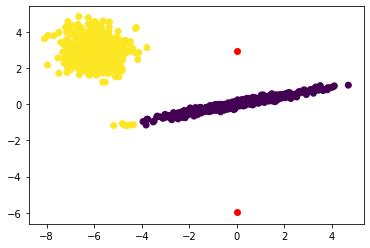

In [282]:
plt.scatter(cluster_df[0], cluster_df[1], c=clusters)
plt.scatter(centroids[0],centroids[1], c='r')
plt.show()